Project 3: Unsupervised Learning

tpham328

Diabetes Dataset

In [179]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from scipy import stats
from sklearn.metrics import mean_squared_error, homogeneity_score, completeness_score, adjusted_rand_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


from warnings import filterwarnings
filterwarnings(action='ignore')

In [180]:
data = pd.read_csv("diabetes.csv")
print("Successfully Imported Data!")

data.head()
print(data.shape)

Successfully Imported Data!
(768, 9)


In [181]:
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

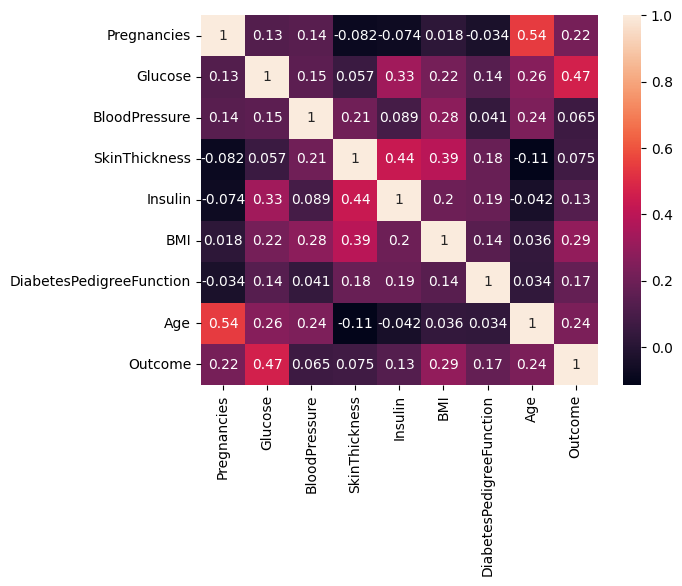

In [182]:
corr = data.corr()
sns.heatmap(corr,annot=True)

In [183]:


# Assuming 'data' is your dataframe and 'quality' is the label column
X = data.drop(columns='Outcome')
original_Y = data['Outcome']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


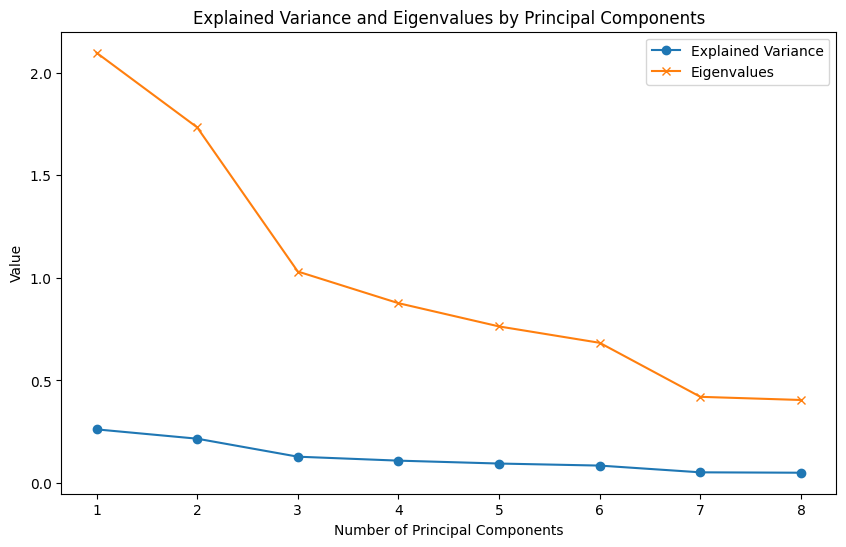

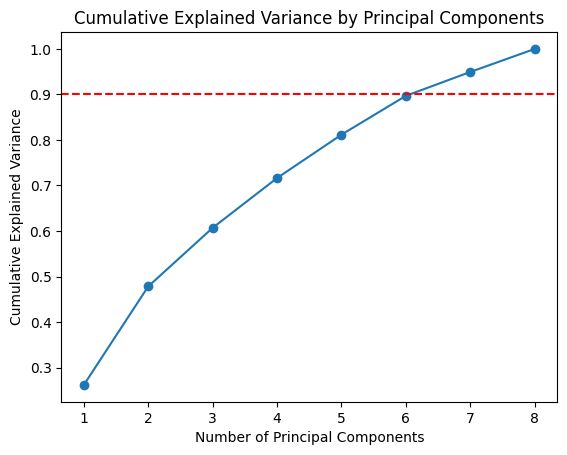

Optimal number of components for 90% variance: 7


In [184]:
# Apply PCA with all components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance and eigenvalues
explained_variance = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Explained Variance')
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='x', label='Eigenvalues')
plt.xlabel('Number of Principal Components')
plt.ylabel('Value')
plt.title('Explained Variance and Eigenvalues by Principal Components')
plt.legend()
plt.show()

# Plot cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
# plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--')  # 95% variance threshold
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()

# Find the optimal number of components for 95% variance
optimal_n_components = np.argmax(cumulative_explained_variance >= 0.9) + 1
print(f'Optimal number of components for 90% variance: {optimal_n_components}')

In [185]:

# Apply PCA with 6 components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results and the true labels
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(6)])
df_pca['original_Y'] = original_Y

# # Calculate explained variance
# explained_variance = pca.explained_variance_ratio_
# cumulative_explained_variance = explained_variance.cumsum()
# print(f'Explained Variance Ratio: {explained_variance}')
# print(f'Cumulative Explained Variance: {cumulative_explained_variance}')

# Reconstruct the original data
X_reconstructed = pca.inverse_transform(X_pca)

# Calculate reconstruction error
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print(f'Reconstruction Error: {reconstruction_error}')


Reconstruction Error: 0.10303477845020274


In [186]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, original_Y, test_size=0.2, random_state=328)

# Train a classifier (e.g., logistic regression)
clf = LogisticRegression(random_state=328)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate classification performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy: {accuracy}')



Classification Accuracy: 0.7597402597402597


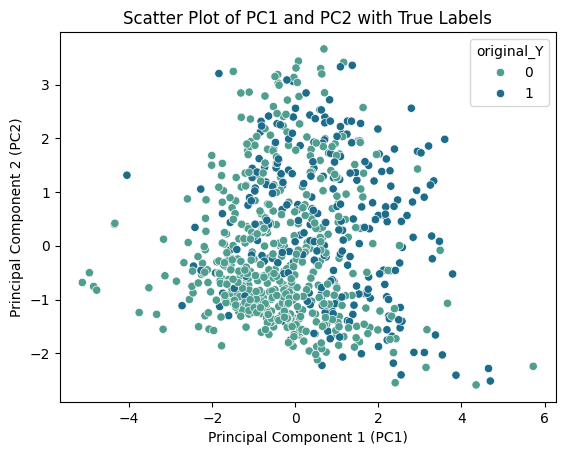

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of the first two principal components
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='original_Y', palette='crest')
plt.title('Scatter Plot of PC1 and PC2 with True Labels')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()


# Apply KMean Cluster to PCA

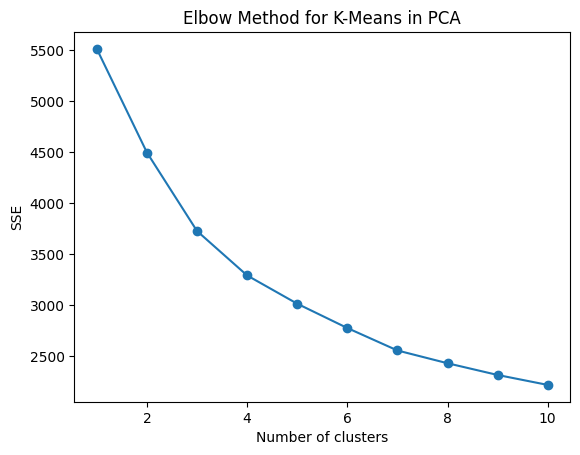

In [188]:

# Elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=328)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

# plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for K-Means in PCA')
plt.show()


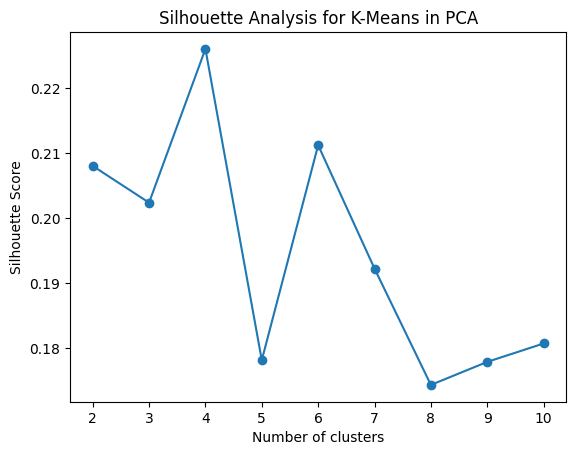

In [189]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=328)
    kmeans_labels = kmeans.fit_predict(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, kmeans_labels))

# plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-Means in PCA')
plt.show()


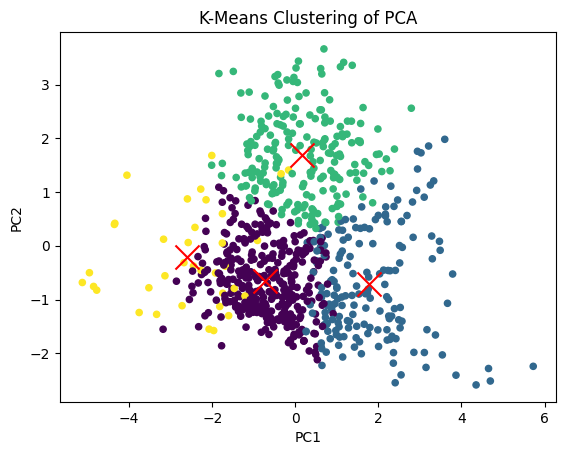

KMeans Homogeneity: 0.148
KMeans Completeness: 0.080


In [190]:
# Optimal number of clusters from the Elbow or Silhouette method
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=328)
kmeans_labels = kmeans.fit_predict(X_pca)

# Calculate homogeneity and completeness for KMeans
kmeans_homogeneity = homogeneity_score(original_Y, kmeans_labels)
kmeans_completeness = completeness_score(original_Y, kmeans_labels)
# Scatter plot with cluster centers
# plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:,1], c=kmeans_labels, marker='o', s =20)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering of PCA')
plt.show()

print(f"KMeans Homogeneity: {kmeans_homogeneity:.3f}")
print(f"KMeans Completeness: {kmeans_completeness:.3f}")

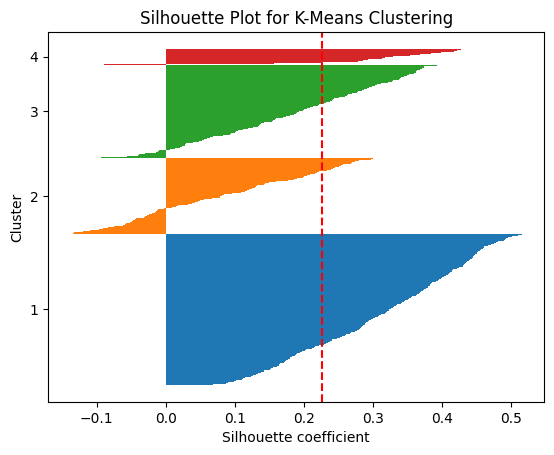

In [191]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

# Silhouette plot
silhouette_vals = silhouette_samples(X_pca, kmeans_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(kmeans_labels)):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(kmeans_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot for K-Means Clustering')
plt.show()

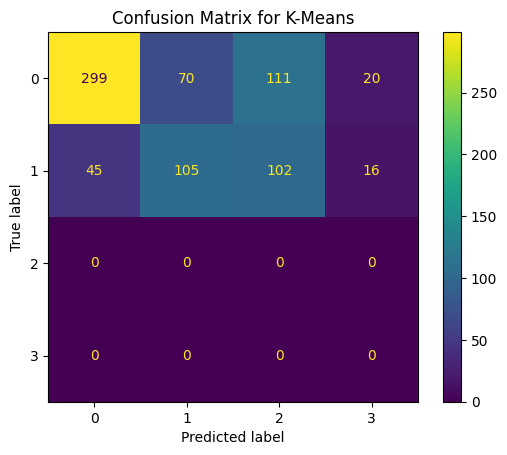

In [192]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_kmeans = confusion_matrix(original_Y, kmeans_labels)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans)
disp_kmeans.plot()
plt.title('Confusion Matrix for K-Means')
plt.show()

[0.26179749 0.47819876 0.60690249 0.71634362 0.81163667 0.89696522
 0.94944224 1.        ]


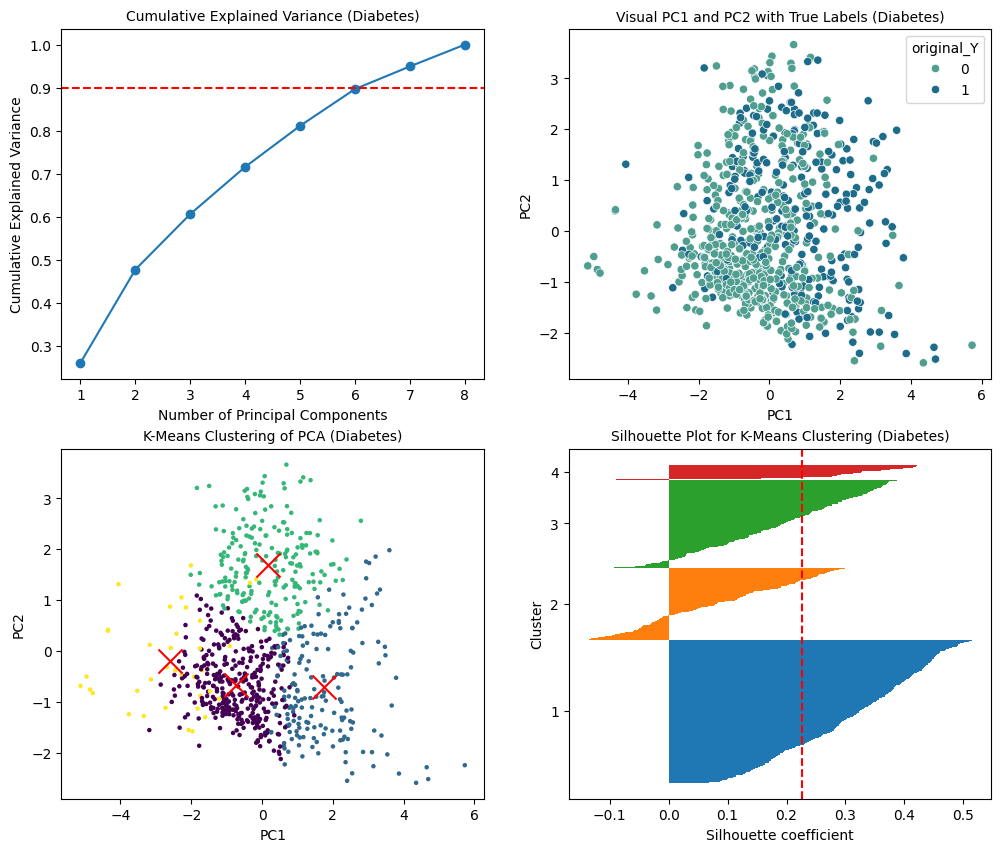

In [197]:
plt.figure(figsize=(12, 10))

print(cumulative_explained_variance)
plt.subplot(2,2,1)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--')  # 95% variance threshold
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance (Diabetes)', fontsize = 10)

plt.subplot(2,2,2)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='original_Y', palette='crest')
plt.title('Visual PC1 and PC2 with True Labels (Diabetes)', fontsize = 10)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(2,2,3)
plt.scatter(X_pca[:, 0], X_pca[:,1], c=kmeans_labels, marker='o', s =5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering of PCA (Diabetes)', fontsize = 10)

plt.subplot(2,2,4)
silhouette_vals = silhouette_samples(X_pca, kmeans_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(kmeans_labels)):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(kmeans_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot for K-Means Clustering (Diabetes)', fontsize = 10)
plt.show()

# Apply EM Cluster to PCA

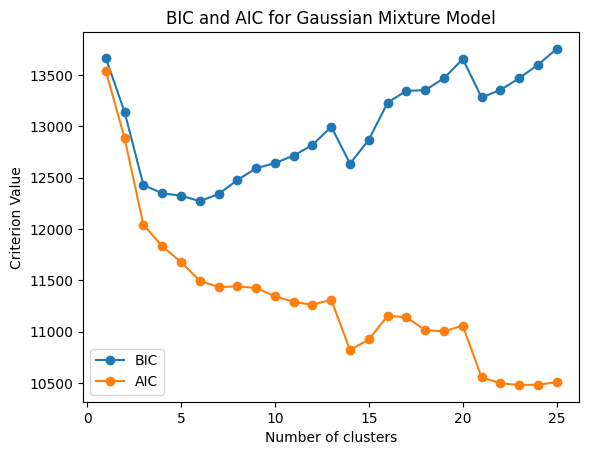

In [198]:
n_components_range = range(1, 26)
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=328)
    gmm.fit(X_pca)
    bics.append(gmm.bic(X_pca))
    aics.append(gmm.aic(X_pca))

# Plot BIC and AIC

plt.plot(n_components_range, bics, label='BIC', marker='o')
plt.plot(n_components_range, aics, label='AIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Criterion Value')
plt.title('BIC and AIC for Gaussian Mixture Model')
plt.legend()
plt.show()


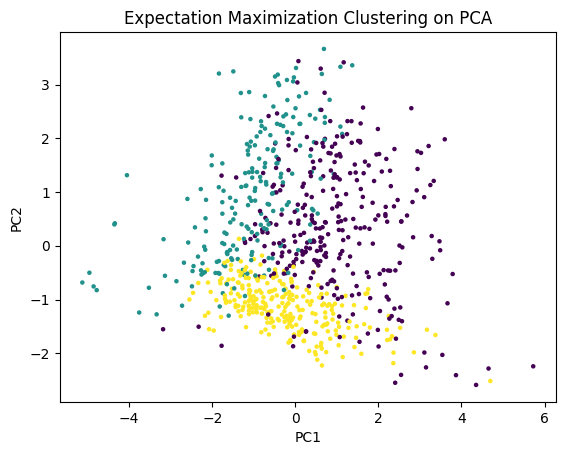

Gaussian Mixture Homogeneity: 0.073
Gaussian Mixture Completeness: 0.043


In [199]:
# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components = 3, random_state=328)
gmm_labels = gmm.fit_predict(X_pca)

# Calculate homogeneity and completeness for Gaussian Mixture
gmm_homogeneity = homogeneity_score(original_Y, gmm_labels)
gmm_completeness = completeness_score(original_Y, gmm_labels)

# Scatter plot
# plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, marker='o',s = 5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Expectation Maximization Clustering on PCA')
plt.show()

print(f"Gaussian Mixture Homogeneity: {gmm_homogeneity:.3f}")
print(f"Gaussian Mixture Completeness: {gmm_completeness:.3f}")

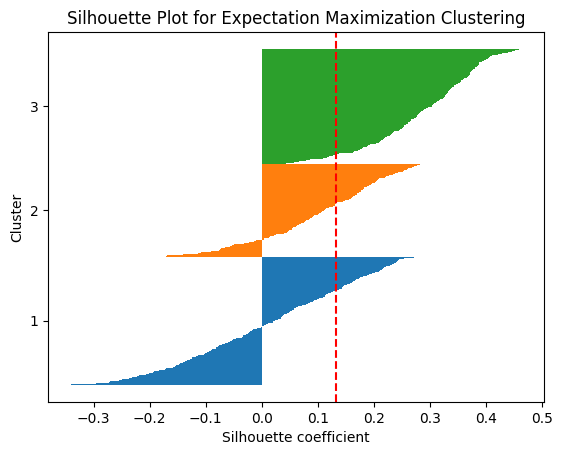

In [200]:
# Silhouette plot for GMM
silhouette_vals_gmm = silhouette_samples(X_pca, gmm_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(gmm_labels)):
    cluster_silhouette_vals = silhouette_vals_gmm[gmm_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals_gmm), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(gmm_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot for Expectation Maximization Clustering')
plt.show()

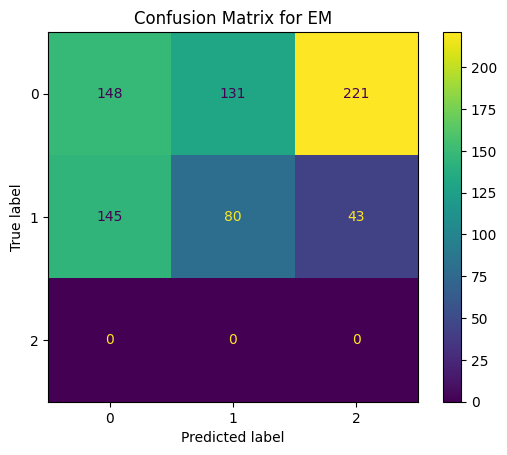

In [202]:
cm_gmm = confusion_matrix(original_Y, gmm_labels)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_gmm)
disp_kmeans.plot()
plt.title('Confusion Matrix for EM')
plt.show()

Quick train/test model to see clustering with PCA impact

Adjusted Rand Index: 0.10


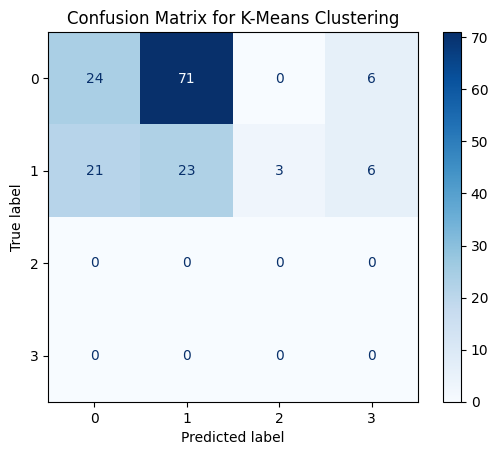

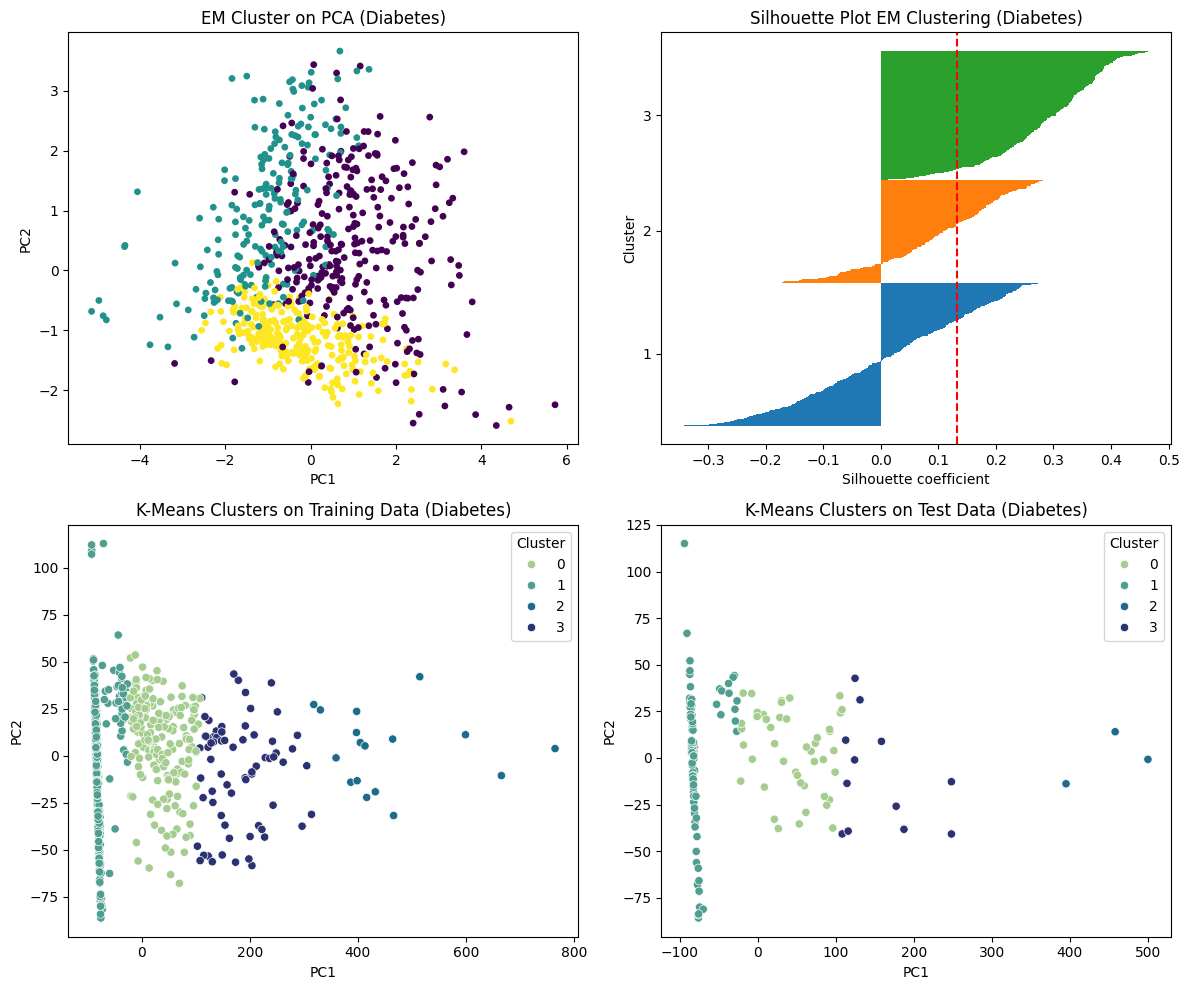

In [203]:

X_train, X_test, y_train, y_test = train_test_split(X, original_Y, test_size=0.2, random_state=328)

# Apply PCA to the training data
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train K-Means clustering model on PCA-transformed training data
kmeans = KMeans(n_clusters=4, random_state=328)
kmeans.fit(X_train_pca)
train_labels = kmeans.labels_

# Predict clusters for the test data
test_labels = kmeans.predict(X_test_pca)

# Evaluate the clustering performance using Adjusted Rand Index
ari = adjusted_rand_score(y_test, test_labels)
print(f"Adjusted Rand Index: {ari:.2f}")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, test_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()

# Visualize the clusters in PCA-reduced space
plt.figure(figsize=(12, 10))

plt.subplot(2, 2,1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, marker='o',s = 15)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('EM Cluster on PCA (Diabetes)')

plt.subplot(2,2,2)
silhouette_vals_gmm = silhouette_samples(X_pca, gmm_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(gmm_labels)):
    cluster_silhouette_vals = silhouette_vals_gmm[gmm_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals_gmm), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(gmm_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot EM Clustering (Diabetes)')

# Training set visualization
plt.subplot(2, 2, 3)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=train_labels, palette='crest')
plt.title('K-Means Clusters on Training Data (Diabetes)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')

# Test set visualization
plt.subplot(2, 2, 4)
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=test_labels, palette='crest')
plt.title('K-Means Clusters on Test Data (Diabetes)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

# ICA

[0.83998118]
[-0.59782576  0.99431208]
[ 3.40081345  2.56536134 -0.56582097]
[ 2.85539766  2.64351354  5.19966148 -0.56412619]
[-0.56772895  4.21117283  5.52981957  0.15123666  3.19896185]
[ 3.7558258   2.95725066 -0.61736531  6.57017735  0.1198875   5.41481951]
[ 3.10230128  5.27552025  7.00392341  3.00527505  2.67228044 -0.59800256
 -0.53630023]
[ 9.23671418  5.44541417  1.16448878  4.15817138  7.22369124  2.36706459
 -0.63132573  1.99029889]
[ 9.23671418  5.44541417  1.16448878  4.15817138  7.22369124  2.36706459
 -0.63132573  1.99029889]
[0.8399811811800757, 0.7960689173572748, 2.1773319235296147, 2.8156747155606685, 2.731783969566699, 3.239221021881163, 3.1705147466155927, 4.027146121634654, 4.027146121634654]


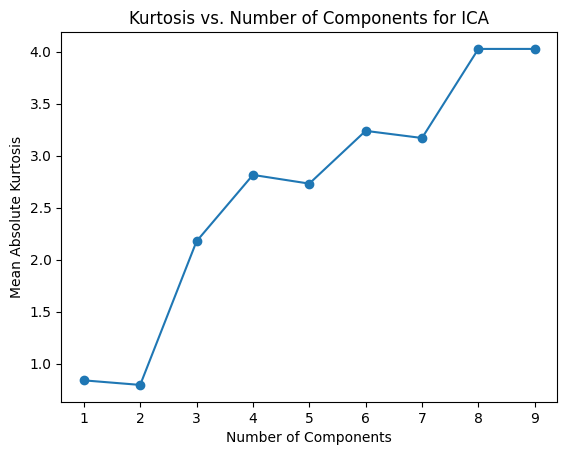

In [ ]:


kurtosis_values = []

# Apply ICA with different 9 of components
for n_components in range(1, 10):
    ica = FastICA(n_components=n_components, random_state=328)
    X_ica = ica.fit_transform(X_scaled)
    # Calculate kurtosis for each component
    kurt_vals = stats.kurtosis(X_ica)
    print(kurt_vals)
    # Mean kurtosis value for the current number of components
    kurtosis_values.append(np.mean(np.abs(kurt_vals)))

print(kurtosis_values)
# Plot kurtosis values

plt.plot(range(1,10), kurtosis_values, marker='o')

plt.xlabel('Number of Components')
plt.ylabel('Mean Absolute Kurtosis')
plt.title('Kurtosis vs. Number of Components for ICA')
plt.show()


[-0.56772895  4.21117283  5.52981957  0.15123666  3.19896185]


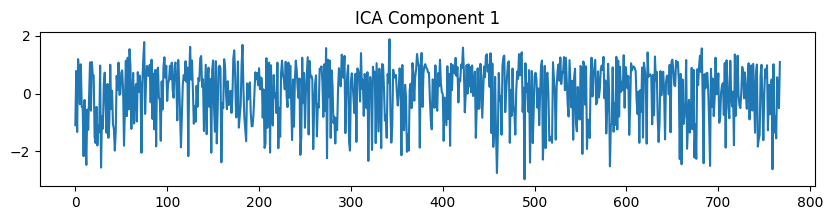

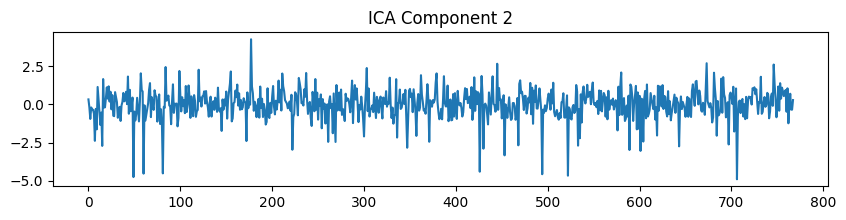

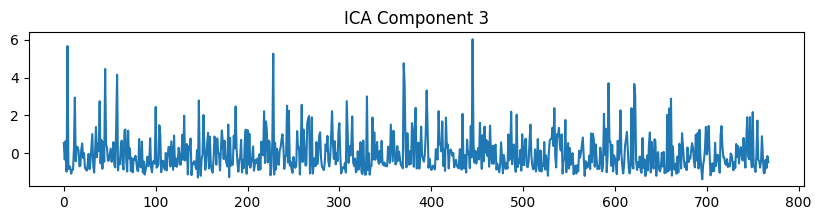

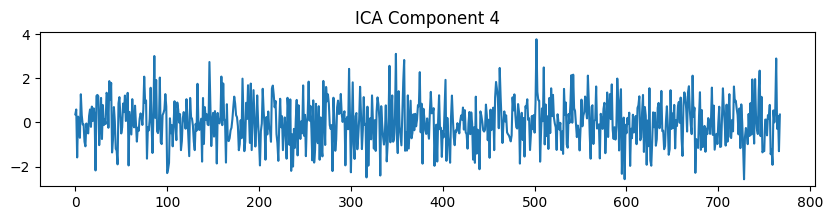

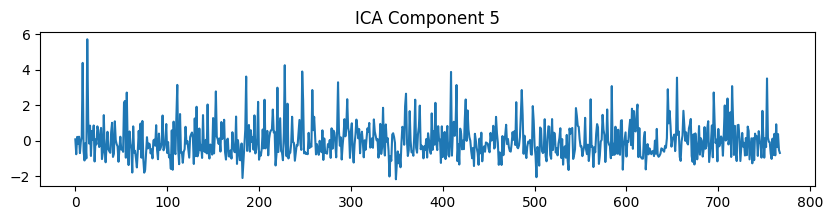

In [ ]:

# Assuming 'ica' is the fitted FastICA model with n_components=5
ica = FastICA(n_components=5, random_state=328)
X_ica = ica.fit_transform(X_scaled)

kurt_vals = stats.kurtosis(X_ica)
print(kurt_vals)

# Plot each of the 5 components
for i in range(5):
    plt.figure(figsize=(10, 2))
    plt.plot(X_ica[:, i])
    plt.title(f'ICA Component {i+1}')
    plt.show()

In [ ]:
# Reconstruct the original data
X_reconstructed = ica.inverse_transform(X_ica)

# Calculate reconstruction error (mean squared error)
from sklearn.metrics import mean_squared_error
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print(f'Reconstruction Error: {reconstruction_error}')


Reconstruction Error: 0.18836332694351432


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform K-Means clustering on ICA components
kmeans = KMeans(n_clusters=4, random_state=42)  # Assuming 3 clusters
kmeans_labels = kmeans.fit_predict(X_ica)

# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(X_ica, kmeans_labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.19327349552127782


In [ ]:
# Reconstruct the original data
X_reconstructed = ica.inverse_transform(X_ica)

# Calculate reconstruction error (mean squared error)
from sklearn.metrics import mean_squared_error
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print(f'Reconstruction Error: {reconstruction_error}')


Reconstruction Error: 0.18836332694351432


In [ ]:


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ica, original_Y, test_size=0.2, random_state=328)

# Train a classifier (e.g., logistic regression)
clf = LogisticRegression(random_state=328)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate classification performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy: {accuracy}')


Classification Accuracy: 0.7467532467532467


In [ ]:
# Find the indices of the two components with the highest absolute kurtosis
print(kurt_vals)
most_meaningful_indices = np.argsort(np.abs(kurt_vals))[-2:]

print(most_meaningful_indices)
# Extract the two most meaningful components
X_ica_most_meaningful = X_ica[:, most_meaningful_indices]


[-0.56772895  4.21117283  5.52981957  0.15123666  3.19896185]
[1 2]


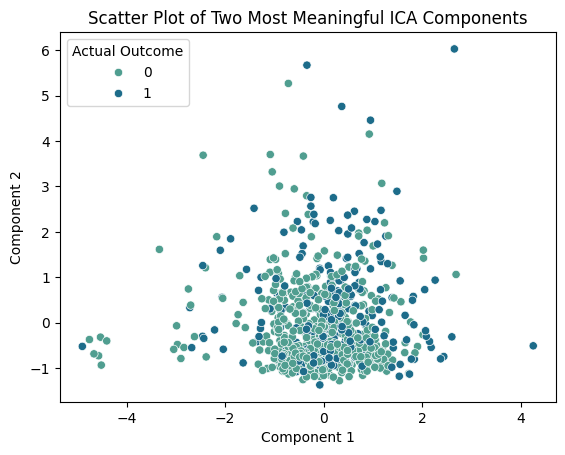

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization
df_ica = pd.DataFrame(X_ica_most_meaningful, columns=['Component 2', 'Component 3'])
df_ica['Actual Outcome'] = original_Y

# Scatter plot of the two most meaningful components
# plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ica, x='Component 2', y='Component 3', hue='Actual Outcome', palette='crest')
plt.title('Scatter Plot of Two Most Meaningful ICA Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


# Apply Kmean Cluster to ICA

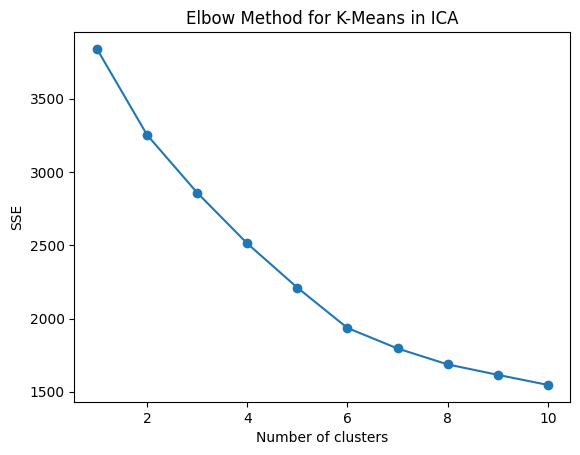

In [ ]:
# Elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=328)
    kmeans.fit(X_ica)
    sse.append(kmeans.inertia_)

# plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for K-Means in ICA')
plt.show()


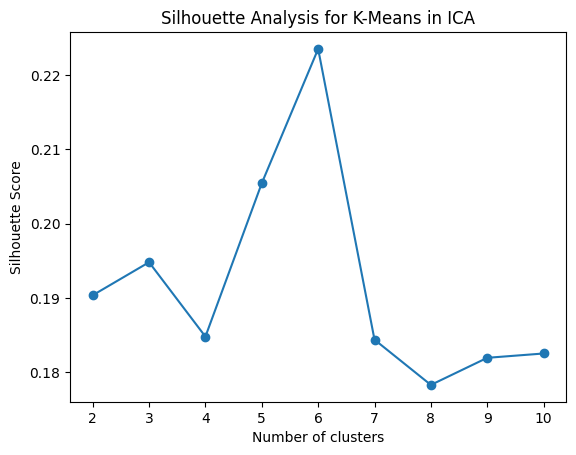

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=328)
    kmeans_labels = kmeans.fit_predict(X_ica)
    silhouette_scores.append(silhouette_score(X_ica, kmeans_labels))

# plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-Means in ICA')
plt.show()


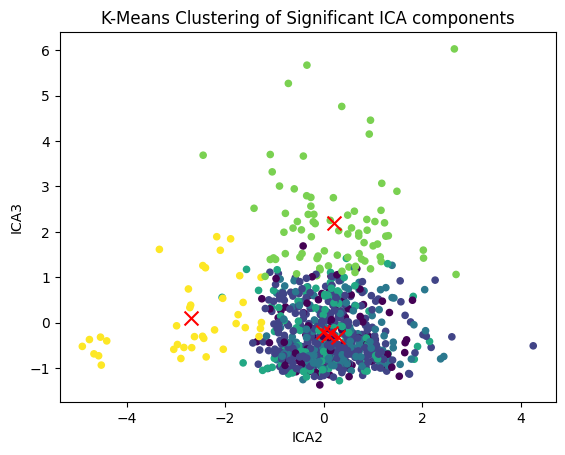

KMeans Homogeneity: 0.109
KMeans Completeness: 0.044


In [ ]:
# Optimal number of clusters from the Elbow or Silhouette method
optimal_clusters = 6

kmeans = KMeans(n_clusters=optimal_clusters, random_state=328)
kmeans_labels = kmeans.fit_predict(X_ica)

# Calculate homogeneity and completeness for KMeans
kmeans_homogeneity = homogeneity_score(original_Y, kmeans_labels)
kmeans_completeness = completeness_score(original_Y, kmeans_labels)
# Scatter plot with cluster centers
plt.scatter(X_ica[:, 1], X_ica[:,2], c=kmeans_labels, marker='o', s =20)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='red', marker='x')
plt.xlabel('ICA2')
plt.ylabel('ICA3')
plt.title('K-Means Clustering of Significant ICA components')
plt.show()

print(f"KMeans Homogeneity: {kmeans_homogeneity:.3f}")
print(f"KMeans Completeness: {kmeans_completeness:.3f}")

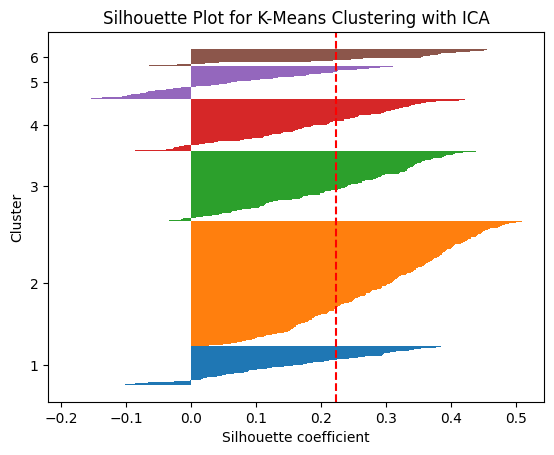

In [ ]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

# Silhouette plot
silhouette_vals = silhouette_samples(X_ica, kmeans_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(kmeans_labels)):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(kmeans_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot for K-Means Clustering with ICA')
plt.show()

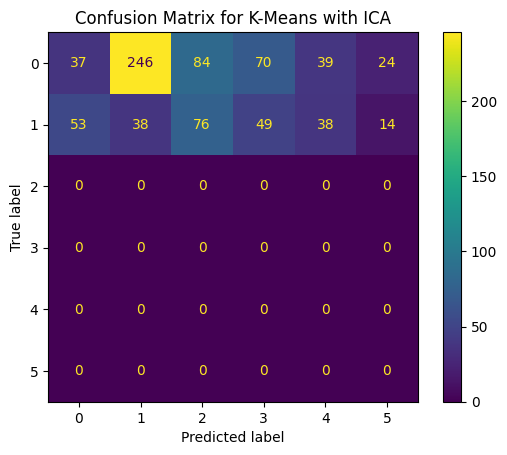

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_kmeans = confusion_matrix(original_Y, kmeans_labels)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans)
disp_kmeans.plot()
plt.title('Confusion Matrix for K-Means with ICA')
plt.show()

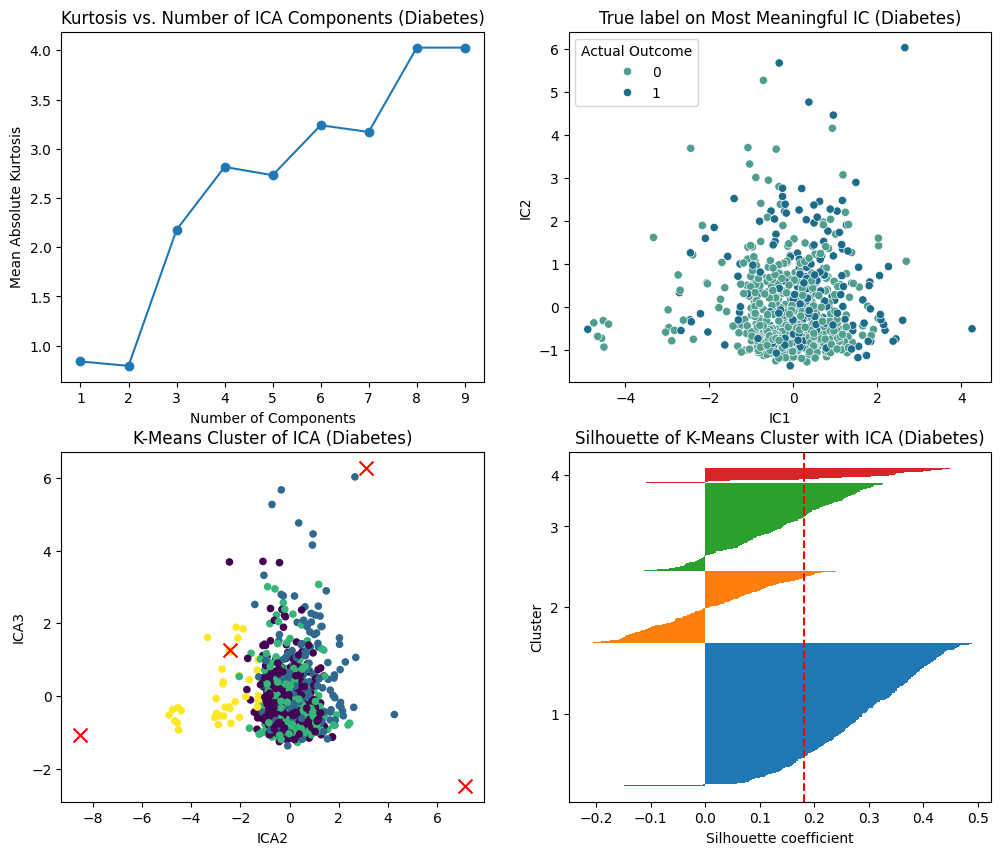

In [212]:
plt.figure(figsize= (12,10))

plt.subplot(2,2,1)
plt.plot(range(1,10), kurtosis_values, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Mean Absolute Kurtosis')
plt.title('Kurtosis vs. Number of ICA Components (Diabetes)')

plt.subplot(2,2,2)
sns.scatterplot(data=df_ica, x='Component 2', y='Component 3', hue='Actual Outcome', palette='crest')
plt.title('True label on Most Meaningful IC (Diabetes)')
plt.xlabel('IC2')
plt.ylabel('IC3')

plt.subplot(2,2,3)
plt.scatter(X_ica[:, 1], X_ica[:,2], c=kmeans_labels, marker='o', s =20)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='red', marker='x')
plt.xlabel('ICA2')
plt.ylabel('ICA3')
plt.title('K-Means Cluster of ICA (Diabetes)')

plt.subplot(2,2,4)
# Silhouette plot
silhouette_vals = silhouette_samples(X_ica, kmeans_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(kmeans_labels)):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(kmeans_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette of K-Means Cluster with ICA (Diabetes)')


plt.show()




# Applying EM Cluster to ICA

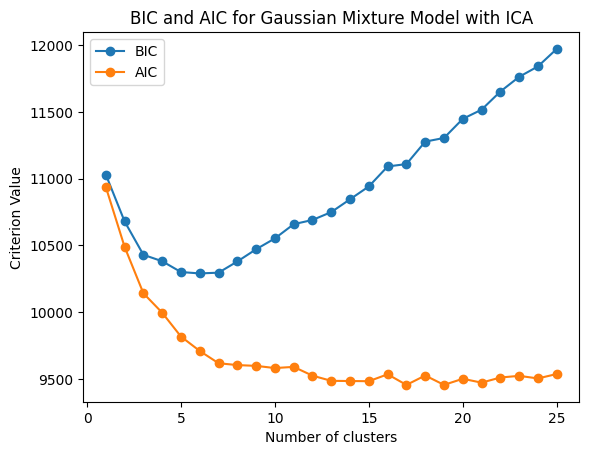

In [213]:
n_components_range = range(1, 26)
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=328)
    gmm.fit(X_ica)
    bics.append(gmm.bic(X_ica))
    aics.append(gmm.aic(X_ica))

# Plot BIC and AIC

plt.plot(n_components_range, bics, label='BIC', marker='o')
plt.plot(n_components_range, aics, label='AIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Criterion Value')
plt.title('BIC and AIC for Gaussian Mixture Model with ICA')
plt.legend()
plt.show()


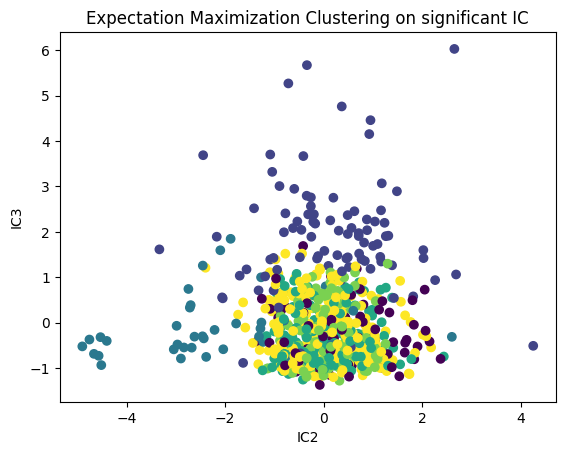

Gaussian Mixture Homogeneity: 0.101
Gaussian Mixture Completeness: 0.039


In [214]:
# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components = 6, random_state=328)
gmm_labels = gmm.fit_predict(X_ica)

# Calculate homogeneity and completeness for Gaussian Mixture
gmm_homogeneity = homogeneity_score(original_Y, gmm_labels)
gmm_completeness = completeness_score(original_Y, gmm_labels)

# Scatter plot
# plt.figure(figsize=(10, 6))
plt.scatter(X_ica[:, 1], X_ica[:, 2], c=gmm_labels, marker='o')
plt.xlabel('IC2')
plt.ylabel('IC3')
plt.title('Expectation Maximization Clustering on significant IC')
plt.show()

print(f"Gaussian Mixture Homogeneity: {gmm_homogeneity:.3f}")
print(f"Gaussian Mixture Completeness: {gmm_completeness:.3f}")

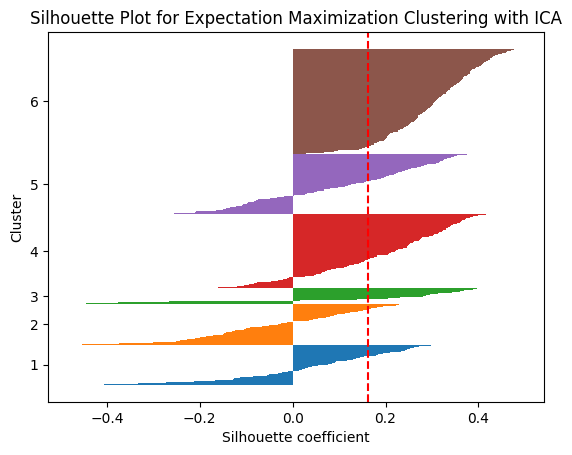

In [215]:
# Silhouette plot for GMM
silhouette_vals_gmm = silhouette_samples(X_ica, gmm_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(gmm_labels)):
    cluster_silhouette_vals = silhouette_vals_gmm[gmm_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals_gmm), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(gmm_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot for Expectation Maximization Clustering with ICA')
plt.show()

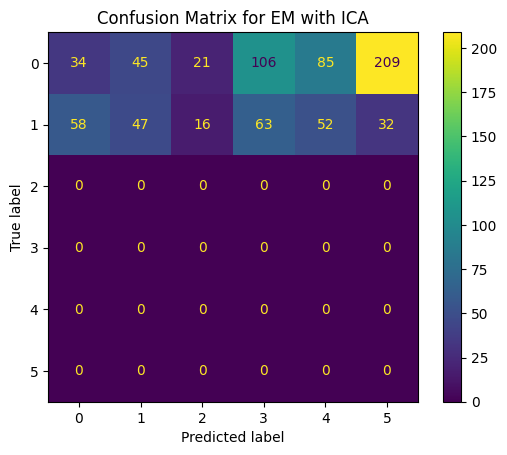

In [216]:
cm_gmm = confusion_matrix(original_Y, gmm_labels)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_gmm)
disp_kmeans.plot()
plt.title('Confusion Matrix for EM with ICA')
plt.show()

Quick train/test split model to see Clustering with ICA

Adjusted Rand Index: 0.06


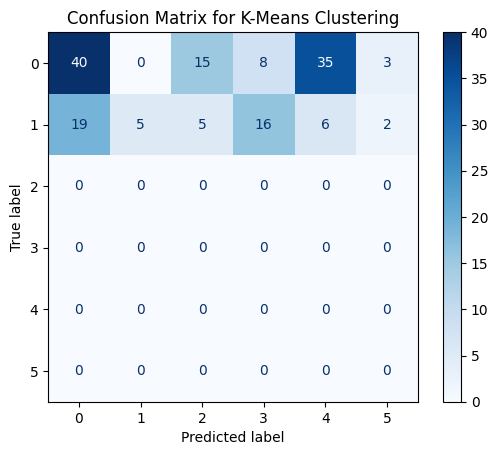

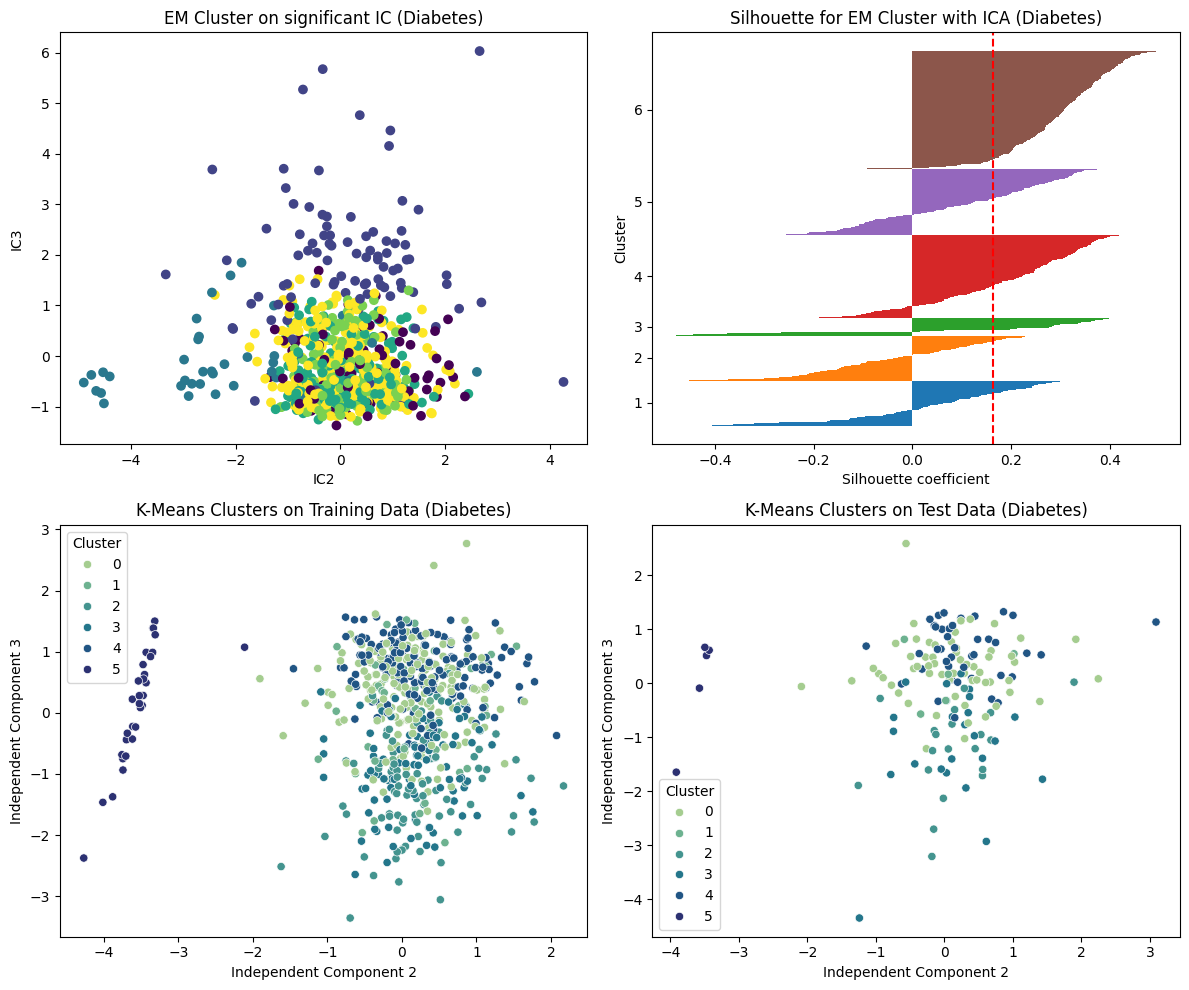

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, original_Y, test_size=0.2, random_state=328)

# Apply ICA to the training data
ica = FastICA(n_components=5, random_state=328)
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)

# Train K-Means clustering model on ICA-transformed training data
kmeans = KMeans(n_clusters=6, random_state=328)
kmeans.fit(X_train_ica)
train_labels = kmeans.labels_

# Predict clusters for the test data
test_labels = kmeans.predict(X_test_ica)

# Evaluate the clustering performance using Adjusted Rand Index
ari = adjusted_rand_score(y_test, test_labels)
print(f"Adjusted Rand Index: {ari:.2f}")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, test_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()


plt.figure(figsize= (12,10))

plt.subplot(2,2,1)
plt.scatter(X_ica[:, 1], X_ica[:, 2], c=gmm_labels, marker='o')
plt.xlabel('IC2')
plt.ylabel('IC3')
plt.title('EM Cluster on significant IC (Diabetes)')

plt.subplot(2,2,2)
silhouette_vals_gmm = silhouette_samples(X_ica, gmm_labels)
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(gmm_labels)):
    cluster_silhouette_vals = silhouette_vals_gmm[gmm_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals_gmm), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(gmm_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette for EM Cluster with ICA (Diabetes)')


# Training set visualization
plt.subplot(2, 2, 3)
sns.scatterplot(x=X_train_ica[:, 1], y=X_train_ica[:, 2], hue=train_labels, palette='crest')
plt.title('K-Means Clusters on Training Data (Diabetes)')
plt.xlabel('Independent Component 2')
plt.ylabel('Independent Component 3')
plt.legend(title='Cluster')

# Test set visualization
plt.subplot(2, 2, 4)
sns.scatterplot(x=X_test_ica[:, 1], y=X_test_ica[:, 2], hue=test_labels, palette='crest')
plt.title('K-Means Clusters on Test Data (Diabetes)')
plt.xlabel('Independent Component 2')
plt.ylabel('Independent Component 3')
plt.legend(title='Cluster')


plt.tight_layout()
plt.show()

# Randomized Projection

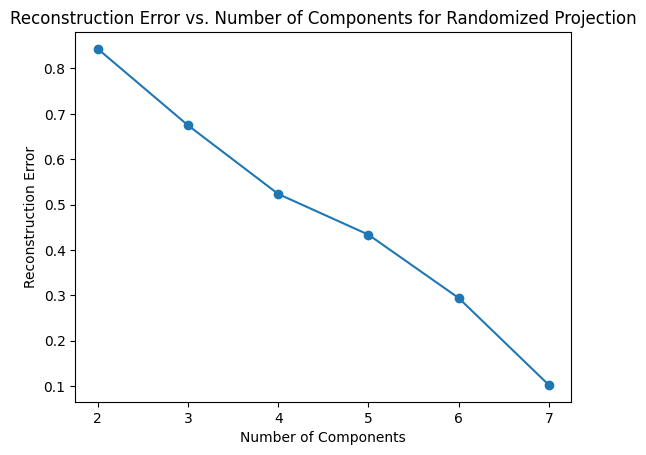

In [219]:
reconstruction_errors = []

# Apply Gaussian Random Projection with different number of components
for n_components in range(2, min(X_scaled.shape[1], 21)):
    grp = GaussianRandomProjection(n_components=n_components, random_state=328)
    X_grp = grp.fit_transform(X_scaled)
    # Compute the pseudo-inverse of the projection matrix
    components_pinv = np.linalg.pinv(grp.components_.T)
    # Reconstruct the original data using the pseudo-inverse of the components
    X_reconstructed = np.dot(X_grp, components_pinv)
    # Calculate reconstruction error
    error = mean_squared_error(X_scaled, X_reconstructed)
    reconstruction_errors.append(error)

# Plot reconstruction errors
# plt.figure(figsize=(10, 6))
plt.plot(range(2, min(X_scaled.shape[1], 21)), reconstruction_errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Number of Components for Randomized Projection')
plt.show()

In [220]:
# Apply Randomized Projection 
grp = GaussianRandomProjection(n_components=4, random_state=328)
X_grp = grp.fit_transform(X_scaled)


# Compute the pseudo-inverse of the projection matrix
components_pinv = np.linalg.pinv(grp.components_.T)
# Reconstruct the original data using the pseudo-inverse of the components
X_reconstructed = np.dot(X_grp, components_pinv)

# Calculate reconstruction error
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print(f'Reconstruction Error: {reconstruction_error}')

Reconstruction Error: 0.5234030922591458


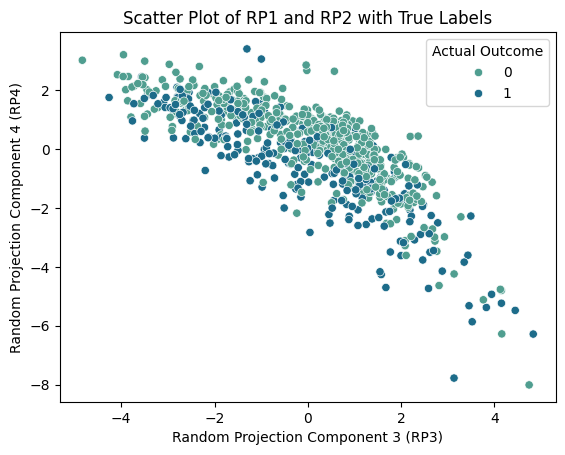

In [239]:
# Create a DataFrame with the RP results and the true labels
df_grp = pd.DataFrame(X_grp, columns=[f'RP{i+1}' for i in range(4)])
df_grp['Actual Outcome'] = original_Y

# Scatter plot of the first two components
# plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_grp, x='RP3', y='RP4', hue='Actual Outcome', palette='crest')
plt.title('Scatter Plot of RP1 and RP2 with True Labels')
plt.xlabel('Random Projection Component 3 (RP3)')
plt.ylabel('Random Projection Component 4 (RP4)')
plt.show()

# Apply K Mean Clustering to RP

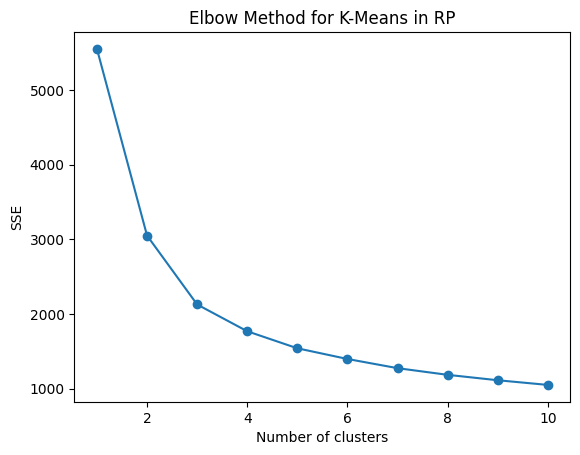

In [222]:

# Elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=328)
    kmeans.fit(X_grp)
    sse.append(kmeans.inertia_)

# plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for K-Means in RP')
plt.show()


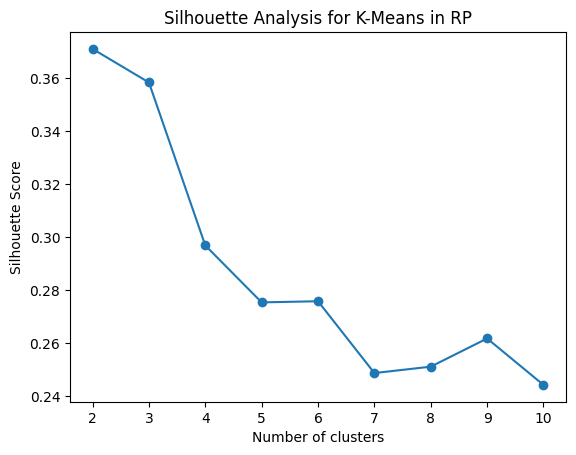

In [225]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=328)
    kmeans_labels = kmeans.fit_predict(X_grp)
    silhouette_scores.append(silhouette_score(X_grp, kmeans_labels))

# plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for K-Means in RP')
plt.show()


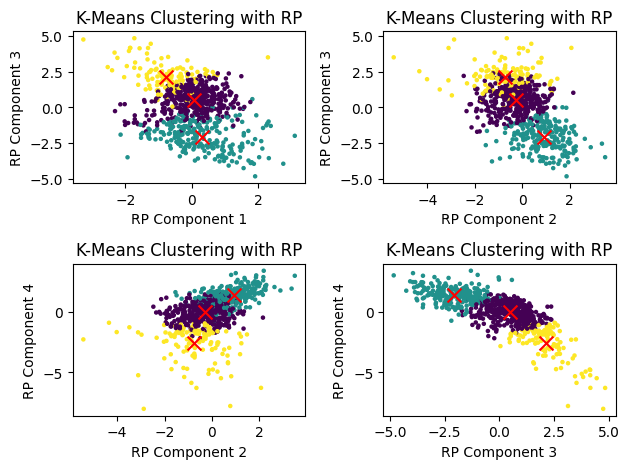

KMeans Homogeneity: 0.032
KMeans Completeness: 0.021


In [226]:
# Optimal number of clusters from the Elbow or Silhouette method
optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, random_state=328)
kmeans_labels = kmeans.fit_predict(X_grp)

# Calculate homogeneity and completeness for KMeans
kmeans_homogeneity = homogeneity_score(original_Y, kmeans_labels)
kmeans_completeness = completeness_score(original_Y, kmeans_labels)
# Scatter plot with cluster centers
# plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
plt.scatter(X_grp[:, 0], X_grp[:,2], c=kmeans_labels, marker='o', s =5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=100, c='red', marker='x')
plt.xlabel('RP Component 1')
plt.ylabel('RP Component 3')
plt.title('K-Means Clustering with RP')

plt.subplot(2,2,2)
plt.scatter(X_grp[:, 1], X_grp[:,2], c=kmeans_labels, marker='o', s =5)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='red', marker='x')
plt.xlabel('RP Component 2')
plt.ylabel('RP Component 3')
plt.title('K-Means Clustering with RP')

plt.subplot(2,2,3)
plt.scatter(X_grp[:, 1], X_grp[:,3], c=kmeans_labels, marker='o', s =5)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s=100, c='red', marker='x')
plt.xlabel('RP Component 2')
plt.ylabel('RP Component 4')
plt.title('K-Means Clustering with RP')

plt.subplot(2,2,4)
plt.scatter(X_grp[:, 2], X_grp[:,3], c=kmeans_labels, marker='o', s =5)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=100, c='red', marker='x')
plt.xlabel('RP Component 3')
plt.ylabel('RP Component 4')
plt.title('K-Means Clustering with RP')

plt.tight_layout()
plt.show()

print(f"KMeans Homogeneity: {kmeans_homogeneity:.3f}")
print(f"KMeans Completeness: {kmeans_completeness:.3f}")

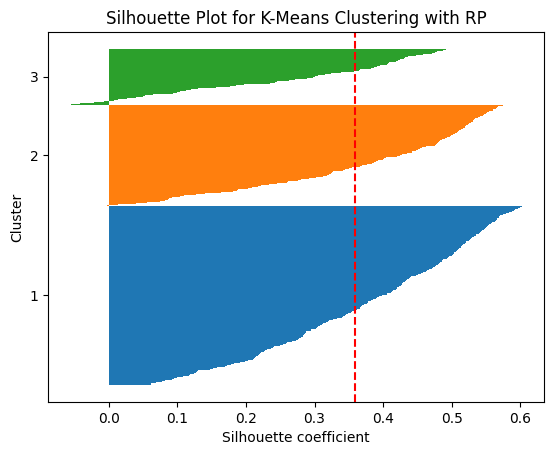

In [227]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

# Silhouette plot
silhouette_vals = silhouette_samples(X_grp, kmeans_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(kmeans_labels)):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(kmeans_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot for K-Means Clustering with RP')
plt.show()

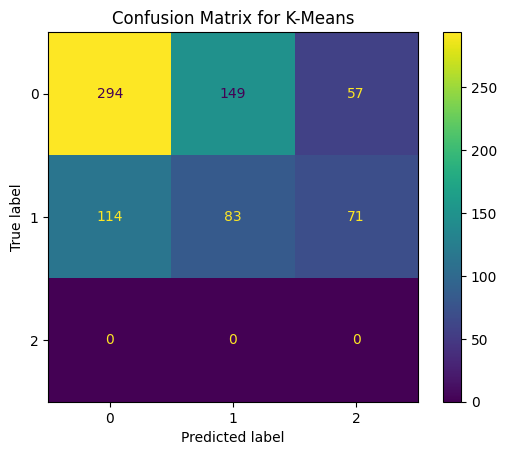

In [228]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_kmeans = confusion_matrix(original_Y, kmeans_labels)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans)
disp_kmeans.plot()
plt.title('Confusion Matrix for K-Means')
plt.show()

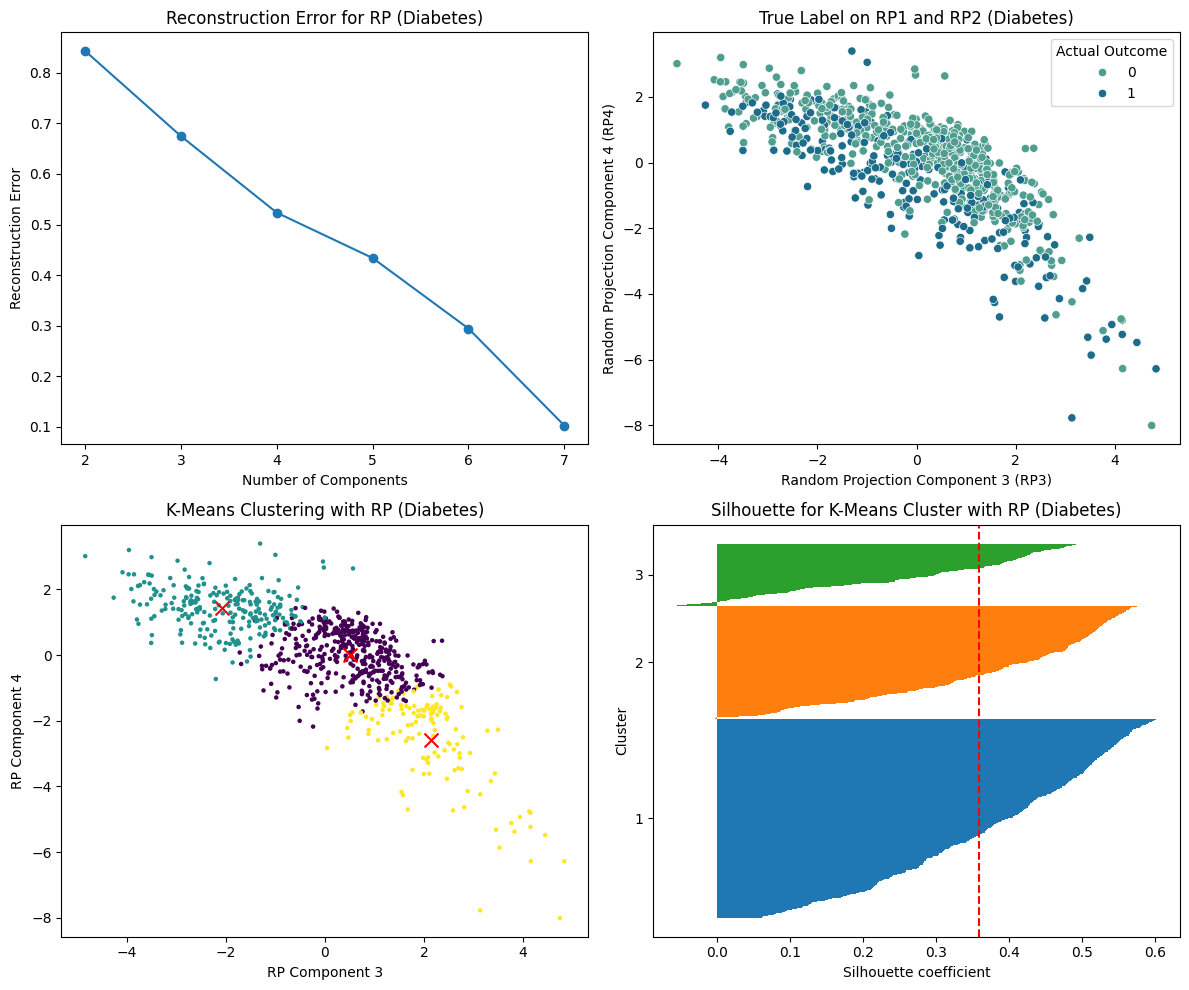

In [244]:
plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)
plt.plot(range(2, min(X_scaled.shape[1], 21)), reconstruction_errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error for RP (Diabetes)')

plt.subplot(2,2,2)
sns.scatterplot(data=df_grp, x='RP3', y='RP4', hue='Actual Outcome', palette='crest')
plt.title('True Label on RP1 and RP2 (Diabetes)')
plt.xlabel('Random Projection Component 3 (RP3)')
plt.ylabel('Random Projection Component 4 (RP4)')

plt.subplot(2,2,3)
plt.scatter(X_grp[:, 2], X_grp[:,3], c=kmeans_labels, marker='o', s =5)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=100, c='red', marker='x')
plt.xlabel('RP Component 3')
plt.ylabel('RP Component 4')
plt.title('K-Means Clustering with RP (Diabetes)')

plt.subplot(2,2,4)
silhouette_vals = silhouette_samples(X_grp, kmeans_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(kmeans_labels)):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(kmeans_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette for K-Means Cluster with RP (Diabetes)')

plt.tight_layout()
plt.show()



# Apply EM Clustering to RP

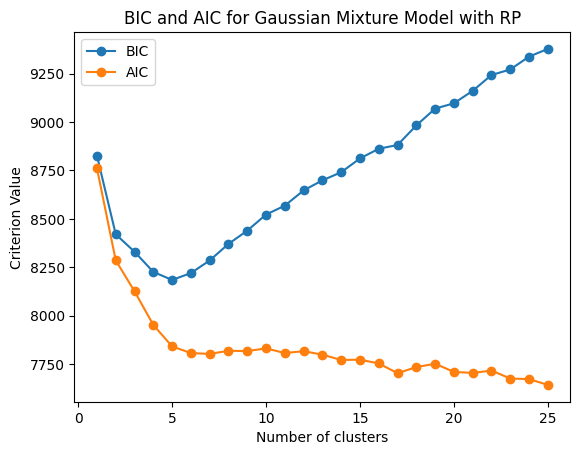

In [247]:
n_components_range = range(1, 26)
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=328)
    gmm.fit(X_grp)
    bics.append(gmm.bic(X_grp))
    aics.append(gmm.aic(X_grp))

# Plot BIC and AIC

plt.plot(n_components_range, bics, label='BIC', marker='o')
plt.plot(n_components_range, aics, label='AIC', marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Criterion Value')
plt.title('BIC and AIC for Gaussian Mixture Model with RP')
plt.legend()
plt.show()

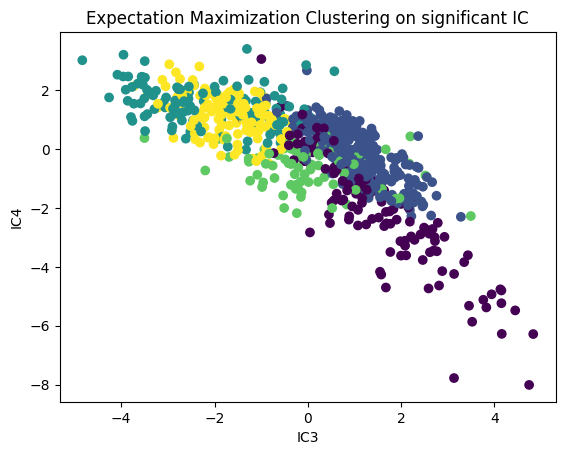

Gaussian Mixture Homogeneity: 0.108
Gaussian Mixture Completeness: 0.046


In [249]:
# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components = 5, random_state=328)
gmm_labels = gmm.fit_predict(X_grp)

# Calculate homogeneity and completeness for Gaussian Mixture
gmm_homogeneity = homogeneity_score(original_Y, gmm_labels)
gmm_completeness = completeness_score(original_Y, gmm_labels)

# Scatter plot
# plt.figure(figsize=(10, 6))
plt.scatter(X_grp[:, 2], X_grp[:, 3], c=gmm_labels, marker='o')
plt.xlabel('IC3')
plt.ylabel('IC4')
plt.title('Expectation Maximization Clustering on significant IC')
plt.show()

print(f"Gaussian Mixture Homogeneity: {gmm_homogeneity:.3f}")
print(f"Gaussian Mixture Completeness: {gmm_completeness:.3f}")

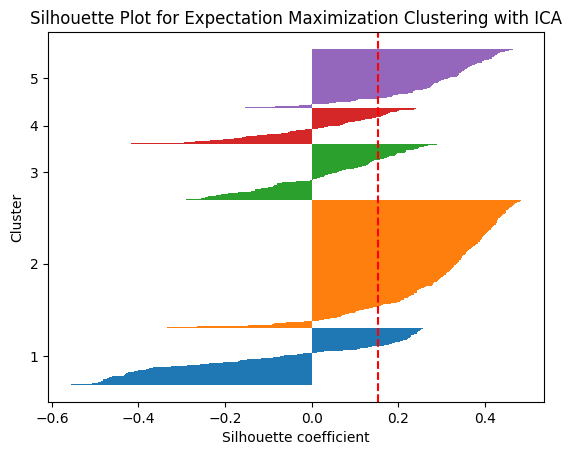

In [250]:
# Silhouette plot for GMM
silhouette_vals_gmm = silhouette_samples(X_grp, gmm_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(gmm_labels)):
    cluster_silhouette_vals = silhouette_vals_gmm[gmm_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals_gmm), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(gmm_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot for Expectation Maximization Clustering with ICA')
plt.show()

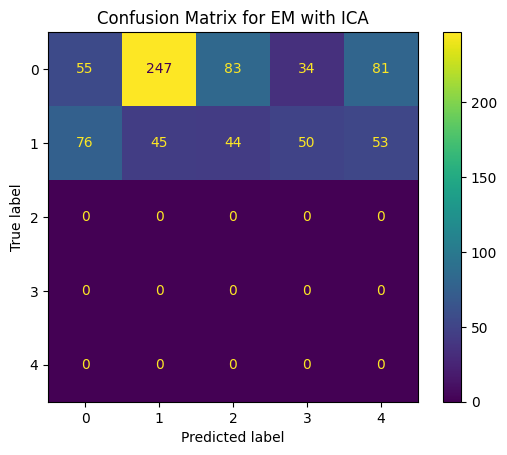

In [251]:
cm_gmm = confusion_matrix(original_Y, gmm_labels)
disp_kmeans = ConfusionMatrixDisplay(confusion_matrix=cm_gmm)
disp_kmeans.plot()
plt.title('Confusion Matrix for EM with ICA')
plt.show()

Split/ Train/ Test with Clustering and RP

Adjusted Rand Index: 0.11


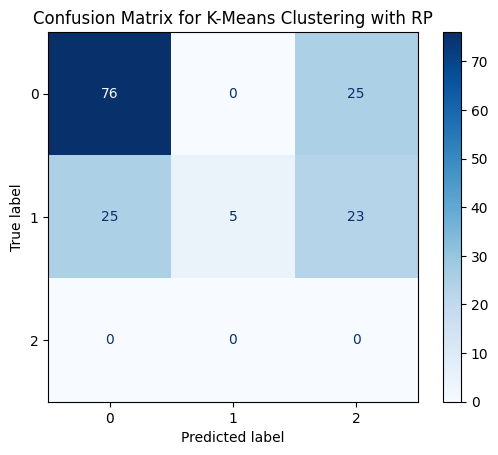

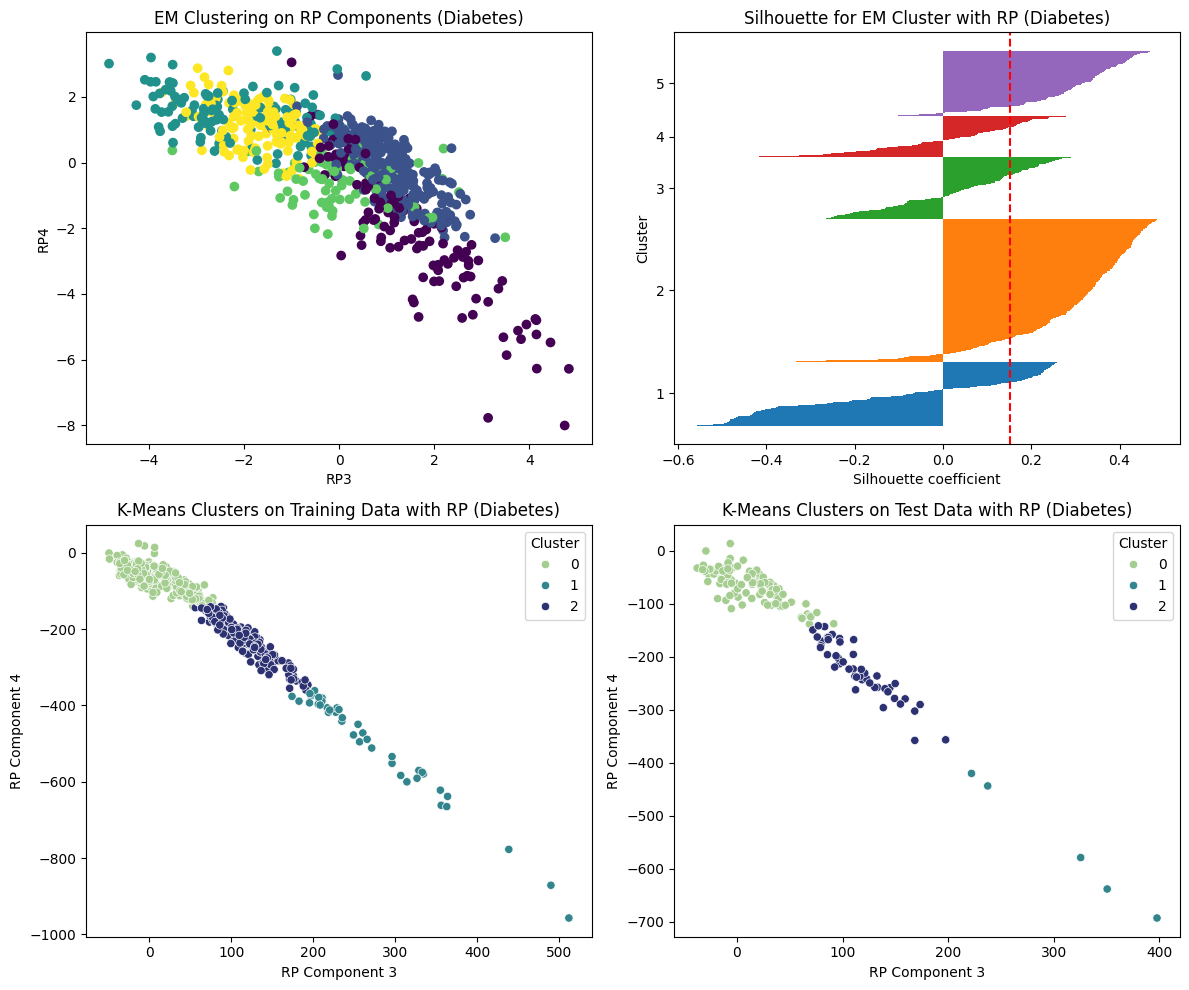

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, original_Y, test_size=0.2, random_state=328)

# Apply ICA to the training data

grp = GaussianRandomProjection(n_components=4, random_state=328)
X_train_rp = grp.fit_transform(X_train)
X_test_rp = grp.transform(X_test)

# Train K-Means clustering model on ICA-transformed training data
kmeans = KMeans(n_clusters=3, random_state=328)
kmeans.fit(X_train_rp)
train_labels = kmeans.labels_

# Predict clusters for the test data
test_labels = kmeans.predict(X_test_rp)

# Evaluate the clustering performance using Adjusted Rand Index
ari = adjusted_rand_score(y_test, test_labels)
print(f"Adjusted Rand Index: {ari:.2f}")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, test_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for K-Means Clustering with RP')
plt.show()

plt.figure(figsize= (12,10))

plt.subplot(2,2,1)
plt.scatter(X_grp[:, 2], X_grp[:, 3], c=gmm_labels, marker='o')
plt.xlabel('RP3')
plt.ylabel('RP4')
plt.title('EM Clustering on RP Components (Diabetes)')

plt.subplot(2,2,2)
silhouette_vals_gmm = silhouette_samples(X_grp, gmm_labels)
y_ticks = []
y_lower, y_upper = 0, 0
# plt.figure(figsize=(10, 6))

for i, cluster in enumerate(np.unique(gmm_labels)):
    cluster_silhouette_vals = silhouette_vals_gmm[gmm_labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(np.mean(silhouette_vals_gmm), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(gmm_labels) + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette for EM Cluster with RP (Diabetes)')


# Training set visualization
plt.subplot(2, 2, 3)
sns.scatterplot(x=X_train_rp[:, 2], y=X_train_rp[:, 3], hue=train_labels, palette='crest')
plt.title('K-Means Clusters on Training Data with RP (Diabetes)')
plt.xlabel('RP Component 3')
plt.ylabel('RP Component 4')
plt.legend(title='Cluster')

# Test set visualization
plt.subplot(2, 2, 4)
sns.scatterplot(x=X_test_rp[:, 2], y=X_test_rp[:, 3], hue=test_labels, palette='crest')
plt.title('K-Means Clusters on Test Data with RP (Diabetes)')
plt.xlabel('RP Component 3')
plt.ylabel('RP Component 4')
plt.legend(title='Cluster')


plt.tight_layout()
plt.show()